In [193]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Uniform

In [353]:
N = 1000
M = 1000
x = np.random.uniform(0, 1, (N, M)) * 2 * np.pi

In [354]:
n_max = 200
z = np.zeros((n_max, M), dtype=np.complex)
for n in range(1, n_max + 1):
    z[n-1] = N**(-1/2) * np.exp(1j * n * x).sum(axis=0)

(array([ 5., 10., 15., 44., 35., 37., 25., 14., 10.,  5.]),
 array([-1.74016148, -1.38184279, -1.02352411, -0.66520542, -0.30688674,
         0.05143195,  0.40975063,  0.76806932,  1.126388  ,  1.48470669,
         1.84302537]),
 <BarContainer object of 10 artists>)

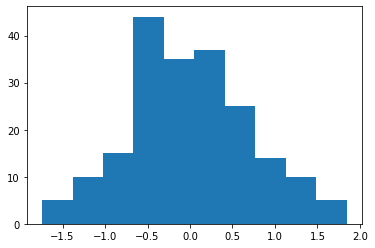

In [355]:
plt.hist(np.real(z)[:, 0])

(array([ 1.,  4., 16., 18., 39., 49., 41., 18., 10.,  4.]),
 array([-2.13127906, -1.733937  , -1.33659494, -0.93925288, -0.54191082,
        -0.14456876,  0.2527733 ,  0.65011536,  1.04745742,  1.44479948,
         1.84214154]),
 <BarContainer object of 10 artists>)

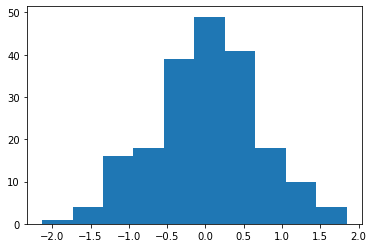

In [356]:
plt.hist(np.imag(z)[:, 0])

In [357]:
# square of the fourier coefficient tends to 1
(np.abs(z)**2).mean(axis=1).mean()

1.000647776085917

In [360]:
# Fourier coefficient tends to 0
z.mean(axis=1).mean()

(0.0008251340292636493-0.0007559799792350524j)

## Power spectra

Should follow an exponential distribution
$$
    P(|z^2| > x) = e^{-x}
$$

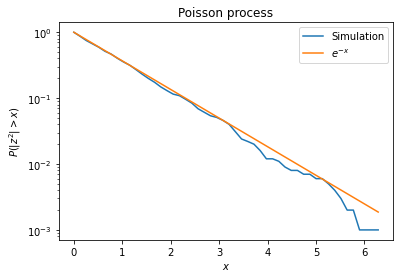

In [361]:
n = 199 # fourier coefficient
length_x = 50
power_spectra = (np.abs(z)**2)
# estimate of the probability
x = np.linspace(0, 2 * np.pi, length_x)
p = np.zeros(length_x)
for i, x_i in enumerate(x):
    p[i] = np.sum(power_spectra[n] > x_i) / power_spectra[n].size

# x = np.linspace(0, 8, 100)
# plt.hist(power_spectra, density=True)
plt.title("Poisson process")
plt.plot(x, p, label="Simulation")
plt.plot(x, np.exp(-x), label=r"$e^{-x}$")
plt.ylabel(r"$P(|z^2| > x)$")
plt.xlabel(r"$x$")
plt.yscale("log")
plt.legend()

In [366]:
(np.var(power_spectra, axis=0) / np.mean(power_spectra, axis=0)).mean()

0.991157187123239

# Clustered

Instead of a uniform distribution, we place $N_c$ points around each cluster ($c$ in number).

When the point are clustered and the wavelength $\lambda_c = 2\pi/n \gg L_c$, the length of the clusters, than the ensemble average value of $|z_n|^2$ becomes
$$
    P(|z_n|^2 > x) = e^{-x/N_c}
$$
On the other hand, when $\lambda_n \ll L_c$, the result should be completely equivalent to the random case.

In [656]:
N = 1000
N_c = 200 # points per clusters
c = N//N_c
r = 0.05 # radius of the cluster
clusters = np.random.uniform(0, 1, (c, M)) * 2 * np.pi
x = np.zeros((N, M))
for _c in range(1, c + 1):
    j = (_c - 1) * N_c
    x[j: j + N_c] = clusters[_c-1] +np.random.normal(0, r, (N_c, M))#+ np.random.uniform(-r, r, (N_c, M)) # +np.random.normal(0, r, (N_c, M))

In [657]:
n_max = 1000
z = np.zeros((n_max, M), dtype=np.complex)
for i, n in enumerate(range(1, n_max + 1)):
    z[i] = N**(-1/2) * np.exp(1j * n * x).sum(axis=0)

In [658]:
power_spectra = np.abs(z)**2

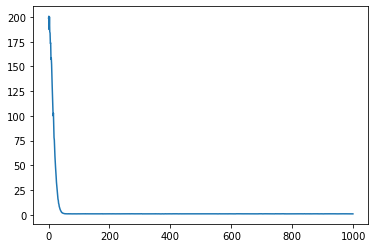

In [659]:
# square of the fourier coefficient tends to N_c
plt.plot(power_spectra.mean(axis=1))

In [660]:
# Fourier coefficient tends to 0
z.mean(axis=1).mean()

(-0.0023325433579067406+0.0005531874505493523j)

In [661]:
length_x = 50
# estimate of the probability
x = np.linspace(0, 2 * np.pi, length_x)
p = np.zeros((length_x, n_max))
m = []
for j, _n in enumerate(range(1, n_max + 1)):
    for i, x_i in enumerate(x):
        p[i, j] = np.sum(power_spectra[j] > x_i) / power_spectra[j].size
    slope, intercept, r_value, p_value, std_err = linregress(x,np.log(p[:, j] + 1e-8))
    m.append(slope)

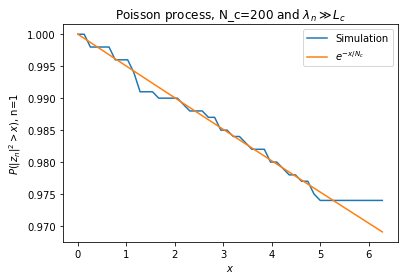

In [662]:
n = 1

# x = np.linspace(0, 8, 100)
# plt.hist(power_spectra, density=True)
plt.title(fr"Poisson process, N_c={N_c} and $\lambda_n \gg L_c$")
plt.plot(x, p[:, n], label="Simulation")
plt.plot(x, np.exp(-x / N_c), label=r"$e^{-x/N_c}$")
plt.ylabel(fr"$P(|z_n|^2 > x)$, n={n}")
plt.xlabel(r"$x$")
# plt.yscale("log")
plt.legend()

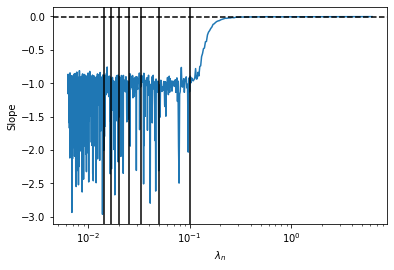

In [663]:
lam = 2 * np.pi / np.array(range(1, n_max+1))
plt.plot(lam, np.array(m))
plt.xlabel(r"$\lambda_n$")
plt.ylabel("Slope")
plt.xscale("log")
plt.axvline(2 * r, ls="-", color="k")
# plt.axvline(16/11 * r, ls="--", color="r")
plt.axvline(r, ls="-", color="k")
# plt.axvline(9/11 * r, ls="--", color="k")
plt.axvline(2/3 * r, ls="-", color="k")
plt.axvline(1/2 * r, ls="-", color="k")
plt.axvline(2/5 * r, ls="-", color="k")
# plt.axvline(4/9 * r, ls="--", color="k")
plt.axvline(7/21 * r, ls="-", color="k")
# plt.axvline(4/13 * r, ls="--", color="k")
plt.axvline(6/21 * r, ls="-", color="k")

# plt.axvline(3/11 * r, ls="-", color="r")

# plt.axvline(1/5 * r, ls="-", color="k")
plt.axhline(-1/N_c, ls="--", color="k")
# structure appear only when cluster have uniform distribution!

As we can see, the slope becomes 1 (uniform distribution), when the wavelength is of the order of the standard deviation (black line)

## Measure of clustering

$$
    r = \frac{\sigma^2_N}{\mathbb{E}[N]}
$$
Greater than 1 means the data is heavily clustered. Less than one means the data is anti-clustered, or spread. Equal to one is the null hypothesis (poisson process).

In [377]:
(np.var(power_spectra, axis=0) / np.mean(power_spectra, axis=0)).mean()

104.5242870458002